<h1><center><b>LGMVIP - Data Science</b></center></h1>
<h2><center><b>Task 2 : Stock Market Prediction and Forecasting using Stacked LSTM (Beginner Level)</b></center></h2>
<h3><center><b>Author : Akshay Paunikar</b></center></h3>

In [1]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

In [3]:
# Load the data
stock_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LGMVIP-Data Science/Task 2 - Stock Market Prediction and Forecasting using Stacked LSTM/NSE-TATAGLOBAL.csv')

In [4]:
# check the first 5 records
stock_data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [5]:
# last 5 records
stock_data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


So we have data from 21 July 2010 till 28 September 2018.

In [6]:
# dimension of the data
stock_data.shape

(2035, 8)

In [7]:
# datatypes present in our data
stock_data.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

In [8]:
# Descriptive Statistics
stock_data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [9]:
# Concise summary of the data
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [10]:
# check for null/missing values
stock_data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

As you can see that there are no null/missing values in the data

Now as our objective is to predict and forecast the stock market / prices we need to sort the data on basis on "Date" column because we all know that the current day data is dependent on the previous days data.

In [12]:
stock_data = stock_data.sort_values('Date')
stock_data.reset_index(inplace=True)
stock_data.head()

,level_0,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [13]:
stock_data.tail()

,level_0,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2030,4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
2031,2031,3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2032,2032,2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2033,2033,1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2034,2034,0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35


Now we will take the "Close" column and do stock prediction on the "Close" prices data.

First we will create a separate data for "Close" column.

In [14]:
close_data = stock_data['Close']

In [15]:
close_data.shape

(2035,)

In [16]:
close_data

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

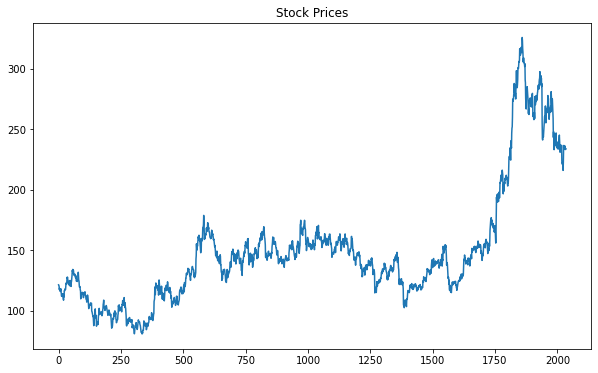

In [17]:
# now we will visualize this data
plt.figure(figsize=(10,6))
plt.plot(close_data)
plt.title("Stock Prices")
plt.show()

Now as we know that LSTM is sensitive towards the scale of the data so we will use MinMaxScaler and transform the values between 0 and 1

In [18]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [19]:
close_data = scaler.fit_transform(np.array(close_data).reshape(-1,1))

In [20]:
close_data

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [21]:
# Now we will split the data into train and test set
train = int(len(close_data)*0.70)
test = len(close_data) - train
print(train)
print(test)

1424
611


In [22]:
train_data = close_data[0:train,:]
test_data = close_data[train:len(close_data),:1]

In [23]:
print(len(train_data))
print(len(test_data))

1424
611


In [24]:
print(train_data)

[[0.16584967]
 [0.16319444]
 [0.1621732 ]
 ...
 [0.15012255]
 [0.15747549]
 [0.15277778]]


In [25]:
print(test_data)

[[0.1621732 ]
 [0.15951797]
 [0.16707516]
 [0.15992647]
 [0.16053922]
 [0.16441993]
 [0.16687092]
 [0.1693219 ]
 [0.16074346]
 [0.15972222]
 [0.16401144]
 [0.15727124]
 [0.14705882]
 [0.14460784]
 [0.15175654]
 [0.15441176]
 [0.15216503]
 [0.14848856]
 [0.15522876]
 [0.15767974]
 [0.1621732 ]
 [0.16094771]
 [0.16339869]
 [0.15931373]
 [0.15972222]
 [0.16115196]
 [0.16666667]
 [0.15747549]
 [0.15379902]
 [0.14848856]
 [0.15114379]
 [0.1503268 ]
 [0.15155229]
 [0.15645425]
 [0.16033497]
 [0.1566585 ]
 [0.15686275]
 [0.17749183]
 [0.17973856]
 [0.1744281 ]
 [0.19281046]
 [0.18607026]
 [0.18811275]
 [0.18443627]
 [0.18280229]
 [0.18464052]
 [0.18178105]
 [0.18913399]
 [0.1870915 ]
 [0.17687908]
 [0.18382353]
 [0.19158497]
 [0.19914216]
 [0.20526961]
 [0.22038399]
 [0.21711601]
 [0.21629902]
 [0.21854575]
 [0.21098856]
 [0.21303105]
 [0.21221405]
 [0.20915033]
 [0.21098856]
 [0.21098856]
 [0.2001634 ]
 [0.2005719 ]
 [0.21609477]
 [0.20772059]
 [0.2064951 ]
 [0.21446078]
 [0.20506536]
 [0.23

In [26]:
# Now we will convert this data into dependent and independent features
def new_data(dataset, time_step=1):
    X, y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        X.append(a)
        y.append(dataset[i+time_step,0])
    return np.array(X), np.array(y)

In [27]:
# reshape data
time_step = 100
X_train, y_train = new_data(train_data, time_step)
X_test, y_test = new_data(test_data, time_step)

In [28]:
print(X_train)

[[0.16584967 0.16319444 0.1621732  ... 0.14011438 0.13848039 0.12479575]
 [0.16319444 0.1621732  0.14971405 ... 0.13848039 0.12479575 0.12254902]
 [0.1621732  0.14971405 0.15400327 ... 0.12479575 0.12254902 0.13010621]
 ...
 [0.18280229 0.19178922 0.19219771 ... 0.16441993 0.15236928 0.15482026]
 [0.19178922 0.19219771 0.19281046 ... 0.15236928 0.15482026 0.15420752]
 [0.19219771 0.19281046 0.21058007 ... 0.15482026 0.15420752 0.15012255]]


In [29]:
print(X_train.shape)
print(y_train.shape)

(1323, 100)
(1323,)


In [30]:
print(X_test.shape)
print(y_test.shape)

(510, 100)
(510,)


In [31]:
# Now we have to reshape this into a 3 dimension for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [32]:
# Create the Stacked LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
21/21 [==============================] - 7s 71ms/step - loss: 0.0120 - val_loss: 0.0387
Epoch 2/100
21/21 [==============================] - 0s 17ms/step - loss: 0.0019 - val_loss: 0.0045
Epoch 3/100
21/21 [==============================] - 0s 16ms/step - loss: 0.0010 - val_loss: 0.0067
Epoch 4/100
21/21 [==============================] - 0s 16ms/step - loss: 8.7686e-04 - val_loss: 0.0056
Epoch 5/100
21/21 [==============================] - 0s 16ms/step - loss: 8.0945e-04 - val_loss: 0.0061
Epoch 6/100
21/21 [==============================] - 0s 17ms/step - loss: 7.8622e-04 - val_loss: 0.0051
Epoch 7/100
21/21 [==============================] - 0s 17ms/step - loss: 7.4494e-04 - val_loss: 0.0037
Epoch 8/100
21/21 [==============================] - 0s 17ms/step - loss: 7.1557e-04 - val_loss: 0.0038
Epoch 9/100
21/21 [==============================] - 0s 17ms/step - loss: 6.8018e-04 - val_loss: 0.0034
Epoch 10/100
21/21 [==============================] - 0s 17ms/step - loss: 6

In [35]:
# Now we will do the prediction
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [36]:
# Transform data to the original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [37]:
train_predict

array([[113.19719 ],
       [111.60311 ],
       [112.620094],
       ...,
       [118.90916 ],
       [119.1586  ],
       [118.6013  ]], dtype=float32)

In [38]:
test_predict

array([[142.72289 ],
       [142.7811  ],
       [140.39978 ],
       [135.94456 ],
       [137.48123 ],
       [138.03407 ],
       [140.4545  ],
       [140.8826  ],
       [138.82574 ],
       [138.44524 ],
       [139.49106 ],
       [142.97368 ],
       [141.83246 ],
       [144.70668 ],
       [147.49959 ],
       [138.23407 ],
       [138.90099 ],
       [142.97641 ],
       [143.0174  ],
       [153.29767 ],
       [152.48422 ],
       [151.14008 ],
       [151.6781  ],
       [148.22014 ],
       [153.23659 ],
       [151.15071 ],
       [151.91695 ],
       [155.01648 ],
       [152.80661 ],
       [152.46022 ],
       [154.39626 ],
       [150.42317 ],
       [145.36848 ],
       [138.10078 ],
       [140.16408 ],
       [140.81151 ],
       [139.73407 ],
       [136.04265 ],
       [132.31259 ],
       [128.15836 ],
       [128.69716 ],
       [128.96564 ],
       [124.256454],
       [125.580635],
       [121.38741 ],
       [118.34701 ],
       [121.190575],
       [120.7

In [39]:
y_train

array([0.12254902, 0.13010621, 0.13541667, ..., 0.15420752, 0.15012255,
       0.15747549])

In [40]:
y_test

array([0.25020425, 0.23999183, 0.22201797, 0.23080065, 0.22896242,
       0.24060458, 0.24080882, 0.23304739, 0.23325163, 0.23672386,
       0.25102124, 0.24387255, 0.25980392, 0.26879085, 0.22896242,
       0.23958333, 0.25081699, 0.24857026, 0.29554739, 0.28574346,
       0.2871732 , 0.28880719, 0.27328431, 0.29513889, 0.28308824,
       0.28982843, 0.30085784, 0.29166667, 0.29227941, 0.29861111,
       0.28206699, 0.26327614, 0.23202614, 0.24101307, 0.23876634,
       0.23549837, 0.22058824, 0.20588235, 0.1875    , 0.19219771,
       0.18995098, 0.16727941, 0.1815768 , 0.15400327, 0.14726307,
       0.16482843, 0.15379902, 0.15992647, 0.14174837, 0.14848856,
       0.1499183 , 0.13950163, 0.15339052, 0.16339869, 0.16748366,
       0.1752451 , 0.16727941, 0.16584967, 0.1744281 , 0.17340686,
       0.1689134 , 0.1752451 , 0.17544935, 0.17320261, 0.17320261,
       0.17075163, 0.17769608, 0.17708333, 0.17708333, 0.16462418,
       0.16605392, 0.15706699, 0.15482026, 0.14726307, 0.16176

In [41]:
y_train = scaler.inverse_transform(y_train.reshape(-1,1))
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

In [42]:
y_train

array([[110.95],
       [112.8 ],
       [114.1 ],
       ...,
       [118.7 ],
       [117.7 ],
       [119.5 ]])

In [43]:
y_test

array([[142.2 ],
       [139.7 ],
       [135.3 ],
       [137.45],
       [137.  ],
       [139.85],
       [139.9 ],
       [138.  ],
       [138.05],
       [138.9 ],
       [142.4 ],
       [140.65],
       [144.55],
       [146.75],
       [137.  ],
       [139.6 ],
       [142.35],
       [141.8 ],
       [153.3 ],
       [150.9 ],
       [151.25],
       [151.65],
       [147.85],
       [153.2 ],
       [150.25],
       [151.9 ],
       [154.6 ],
       [152.35],
       [152.5 ],
       [154.05],
       [150.  ],
       [145.4 ],
       [137.75],
       [139.95],
       [139.4 ],
       [138.6 ],
       [134.95],
       [131.35],
       [126.85],
       [128.  ],
       [127.45],
       [121.9 ],
       [125.4 ],
       [118.65],
       [117.  ],
       [121.3 ],
       [118.6 ],
       [120.1 ],
       [115.65],
       [117.3 ],
       [117.65],
       [115.1 ],
       [118.5 ],
       [120.95],
       [121.95],
       [123.85],
       [121.9 ],
       [121.55],
       [123.65

In [44]:
# Calculate the RMSE for train data
np.sqrt(mean_squared_error(y_train, train_predict))

2.77047796543651

In [45]:
# Calculate the RMSE for test data
np.sqrt(mean_squared_error(y_test, test_predict))

9.641669690503896

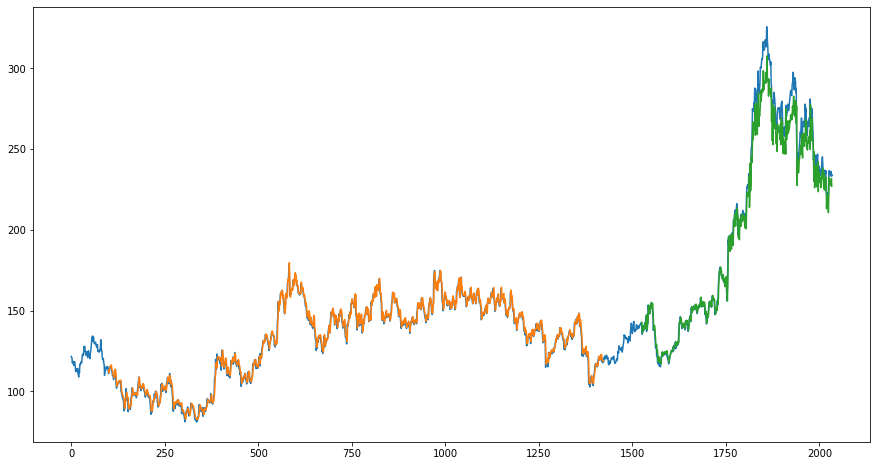

In [46]:
# Now we will plot the predictions along with original output
# shift train predictions for plotting
past_data = 100
trainplot = np.empty_like(close_data)
trainplot[:, :] = np.nan
trainplot[past_data:len(train_predict)+past_data, :] = train_predict

# shift test predictions for plotting
testplot = np.empty_like(close_data)
testplot[:, :] = np.nan
testplot[len(train_predict)+(past_data*2)+1:len(close_data)-1, :] = test_predict

# plot baseline and predictions
plt.figure(figsize=(15,8))
plt.plot(scaler.inverse_transform(close_data))
plt.plot(trainplot)
plt.plot(testplot)
plt.show()

In [47]:
print(len(test_data))

611


In [48]:
611-100

511

In [49]:
x_input = test_data[511:].reshape(1,-1)
x_input.shape

(1, 100)

In [50]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [51]:
temp_input

[0.8527369281045751,
 0.8621323529411764,
 0.8345588235294117,
 0.84375,
 0.7146650326797386,
 0.6605392156862745,
 0.6542075163398693,
 0.6803513071895424,
 0.6689133986928104,
 0.6642156862745099,
 0.678921568627451,
 0.6913807189542482,
 0.7089460784313726,
 0.7226307189542485,
 0.7340686274509802,
 0.7212009803921569,
 0.749795751633987,
 0.7689950980392157,
 0.7446895424836601,
 0.7120098039215685,
 0.7467320261437909,
 0.7549019607843137,
 0.7604166666666667,
 0.7598039215686274,
 0.7465277777777777,
 0.7624591503267975,
 0.7706290849673203,
 0.8041258169934642,
 0.7810457516339868,
 0.7941176470588236,
 0.7602124183006536,
 0.7348856209150327,
 0.7240604575163399,
 0.7399918300653596,
 0.749795751633987,
 0.7614379084967322,
 0.7542892156862746,
 0.7475490196078431,
 0.769607843137255,
 0.7495915032679739,
 0.8171977124183007,
 0.8020833333333335,
 0.7773692810457518,
 0.7571486928104576,
 0.7937091503267975,
 0.7916666666666667,
 0.7714460784313726,
 0.7526552287581698,
 0.7269

In [52]:
# demonstrate prediction for next 50 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<50):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.6034105]
101
1 day input [0.86213235 0.83455882 0.84375    0.71466503 0.66053922 0.65420752
 0.68035131 0.6689134  0.66421569 0.67892157 0.69138072 0.70894608
 0.72263072 0.73406863 0.72120098 0.74979575 0.7689951  0.74468954
 0.7120098  0.74673203 0.75490196 0.76041667 0.75980392 0.74652778
 0.76245915 0.77062908 0.80412582 0.78104575 0.79411765 0.76021242
 0.73488562 0.72406046 0.73999183 0.74979575 0.76143791 0.75428922
 0.74754902 0.76960784 0.7495915  0.81719771 0.80208333 0.77736928
 0.75714869 0.79370915 0.79166667 0.77144608 0.75265523 0.72691993
 0.6629902  0.68198529 0.64419935 0.62152778 0.6439951  0.66319444
 0.67544935 0.63705065 0.64603758 0.65890523 0.65870098 0.67790033
 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013 0.63480392
 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882 0.66196895
 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634  0.62254902
 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908 0.57781863
 0.57230392 0.58006536 0.57618464 

In [53]:
day_new=np.arange(1,101)
day_pred=np.arange(101,151)

In [54]:
len(close_data)

2035

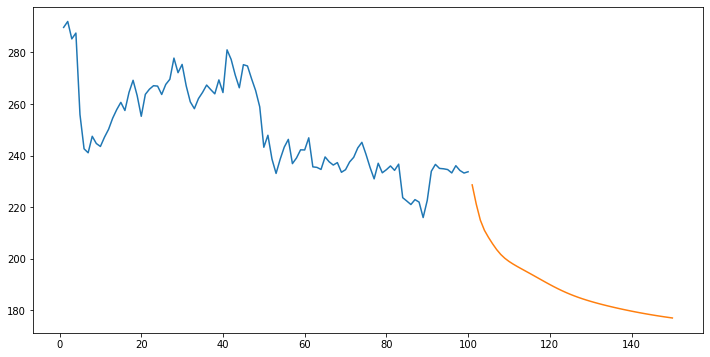

In [55]:
plt.figure(figsize=(12,6))
plt.plot(day_new,scaler.inverse_transform(close_data[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.show()

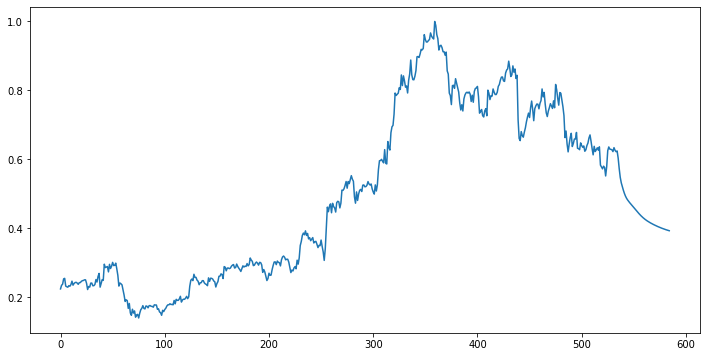

In [56]:
clear_data = close_data.tolist()
clear_data.extend(lst_output)
plt.figure(figsize=(12,6))
plt.plot(clear_data[1500:])
plt.show()

In [57]:
clear_data=scaler.inverse_transform(clear_data).tolist()

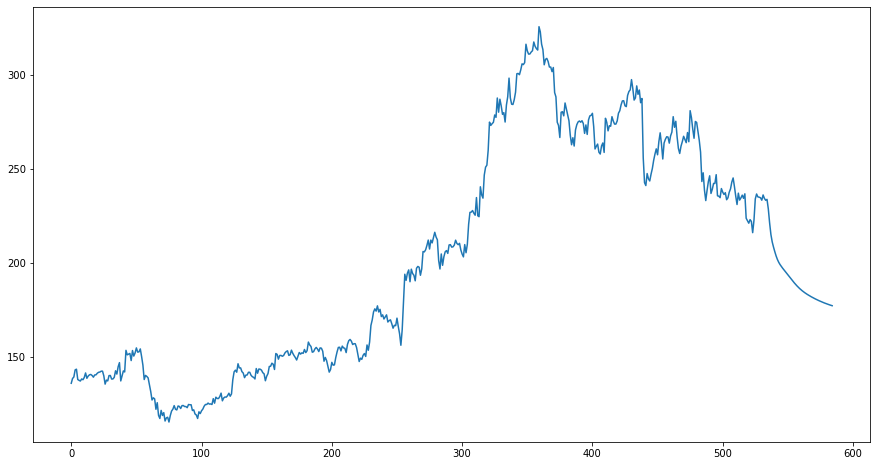

In [58]:
plt.figure(figsize=(15,8))
plt.plot(clear_data[1500:])
plt.show()